### Colvolution Neural Network Forward Pass having 2 Convolution Layer and 1 fully connected Layer

In [29]:
import sys
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import os
import random

### Relu Activation function to achieve Non-linearity

In [30]:
def ReLU(x):
    tempf = []
    for i in x:
        temp1 = []
        for j in i:
            temp = []
            for k in j:
                if k<0.0:
                    temp.append(0.0)
                elif k>255.0:
                    temp.append(255.0)
                else:
                    temp.append(k)
            temp1.append(temp)
        tempf.append(temp1)
    tempf = np.array(tempf)
#     print(tempf.shape)
#     print(tempf)
    return tempf
#     return np.where(x>0,np.where(x<255.0,x,255),0.0)

### Randomly initialize filter matrix 
### filter matrix of dimension 5 * 5

In [31]:
def createFilter(row,col,depth,filtercount):
    filterMatrix = np.random.randn(row,col,depth,filtercount)
#     filterMatrix = random.random(row,col,depth)
#     filterMatrix=np.full((row,col,depth,filtercount), 1)
    return filterMatrix

### Dot product of input data matrix and filter matrix and sum up all elements of matrix

In [32]:
def convolveOperation(data,dataFilter):
#     print(data.shape)
#     print(dataFilter.shape)
    convRes = np.multiply(data,dataFilter)
#     print(convRes)
#     sys.exit(1)
    return convRes.sum()

### Perform convolution operation on input data matrix by slicing filter over matrix and generate feature map

In [33]:
def convolve(data,datafilter):
    filterRow, filterCol, filterdepth, filtercount = datafilter.shape
    dataRow, dataCol, datadepth = data.shape
#     print(datadepth)
    convResultRow = dataRow - filterRow + 1
    convResultCol = dataCol - filterCol + 1
    convResult = np.zeros((convResultRow,convResultCol,filtercount))
    for numfil in range(filtercount):
        for x in range(convResultRow):
            for y in range(convResultCol):
                if x+filterRow > dataRow or y+filterCol > dataCol:
                    break
                convResult[x][y][numfil] = convolveOperation(data[x:x+filterRow,y:y+filterCol,:],datafilter[:,:,:,numfil])
    return convResult

### Perform pooling operation over data(Result of relu)

In [34]:
def maxPooling(data,poolRowSize,poolColSize,stride):
    dataRow, dataCol, resLayer = data.shape
    
    poolResCols = int((dataCol - poolColSize)/stride+1)
    poolResRows = int((dataRow - poolRowSize)/stride+1)
    
#     print(type(poolResCols))
#     print(type(poolResRows))
    poolRes = np.zeros((poolResRows,poolResCols,resLayer))
    for l in range(resLayer):
        i = 0
        while i < dataRow:
            j = 0
            while j < dataCol and i+poolRowSize < dataRow and j+poolColSize < dataCol:
                poolRes[int(i/2),int(j/2),l] = np.max(data[i:i+poolRowSize,j:j+poolColSize,l])
                j += stride
            i += stride
    return poolRes

### Create random weight matrix for neural network with one hidden layer

In [35]:
def createWeightMatrix(inputunits,hiddenunits1,hiddenunits2,outputuints):
    hiddenWeights1 = np.random.randn(inputunits,hiddenunits1)
    hiddenWeights2 = np.random.randn(hiddenunits1,hiddenunits2)
    outputWeights = np.random.randn(hiddenunits2,outputuints)
    return hiddenWeights1,hiddenWeights2,outputWeights

### Sigmoid activation function for forward pass in neural network

In [36]:
def sigmoid(x):
    x = -x
    return 1 / (1+np.exp(x))

### Forward pass of a neural network

In [37]:
def forwardPass(i,inputunits,hiddemunits1,hiddemunits2,outputunits):
    i = i.T
    hiddenWeights1, hiddenWeights2, outputWeights = createWeightMatrix(inputunits,hiddemunits1,hiddemunits2,outputunits)
    hypo_1 = np.dot(i,hiddenWeights1)
    ypredicted_1 = sigmoid(hypo_1)
    hypo_2 = np.dot(ypredicted_1,hiddenWeights2)
    ypredicted_2 = sigmoid(hypo_2)
    hypo_3 = np.dot(ypredicted_2,outputWeights)
    ypredicted_3 = sigmoid(hypo_3)
    return ypredicted_3

### Apply softmax on a output of a neural network to convert values into a probabilities to find most likelihood

In [38]:
def softMax(z):
    expScores = np.exp(z)
    probs = expScores/np.sum(expScores)
    return probs

In [39]:
filterRows = 5
filterCols = 5
filterdepth = 4

filterDepthLayer_1 = 6
filterDepthLayer_2 = 16

nnHiddenUnits1 = 120
nnHiddenUnits2 = 84
nnOutputUnits = 10

poolingRows = 2
poolingCols = 2
filterDepth_fc = 120


imgPath = "test.png"
imgRows = 256
imgCols = 256
imgdepth = 4

stride = 2

In [40]:
def displayImage(imgarray):
    for i in range(imgarray.shape[2]):
        plt.imshow(imgarray[:,:,i])
        plt.show()

Image Dimension : (720, 720, 4)


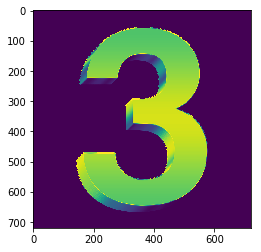

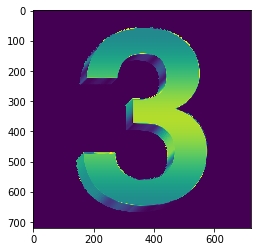

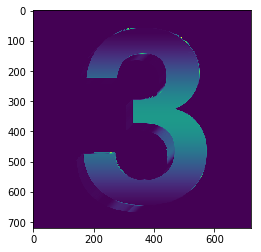

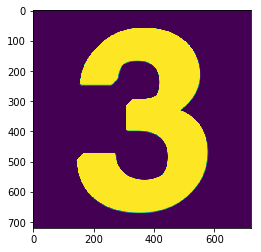

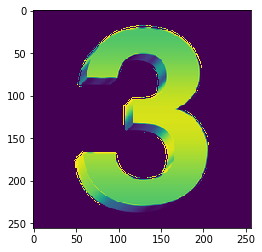

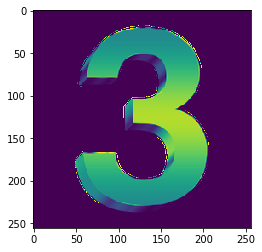

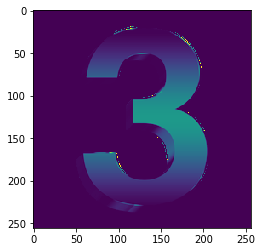

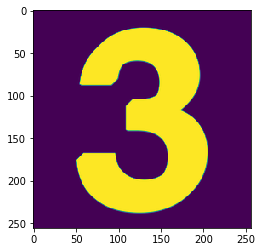

Reduced Image Dimension : (256, 256, 4)


In [41]:
if os.path.isfile(imgPath):
    img = Image.open(imgPath)
    imgArray = np.array(img)
    print("Image Dimension :",imgArray.shape)
#     img1 = Image.fromarray(imgArray,'RGB')
#     img1 = img1.resize((312,312))
#     img1.show()
    displayImage(imgArray)
    img = img.resize((imgRows,imgCols),Image.ANTIALIAS)
#     img = img.resize((32,32),Image.ANTIALIAS)
    reducedImageArray = np.array(img)
#     img1 = Image.fromarray(reducedImageArray,'RGB')
#     img1 = img1.resize((312,312))
#     img1.show()
    displayImage(reducedImageArray)
    print("Reduced Image Dimension :",reducedImageArray.shape)
else:
    print("File Not Found")
    sys.exit(1)


### Actual Implementation

(5, 5, 4, 6)
Dimensions after 1st Convolution : (252, 252, 6)


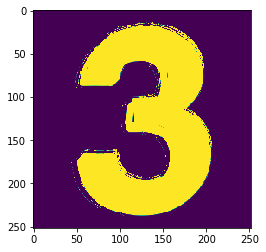

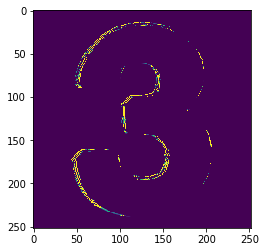

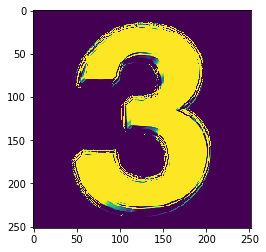

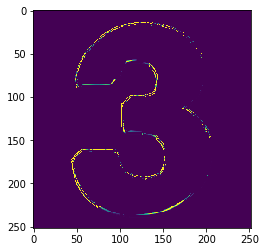

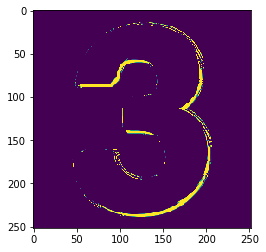

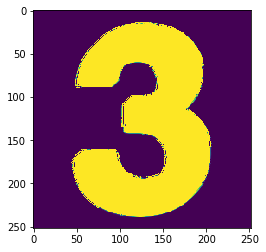

Dimensions after 1st Max Pooling: (126, 126, 6)


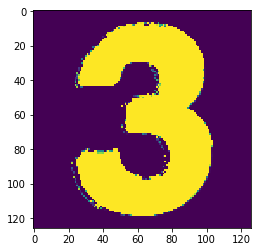

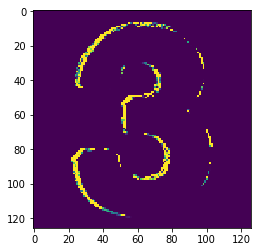

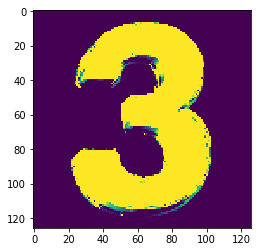

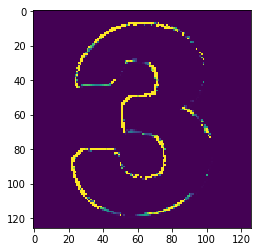

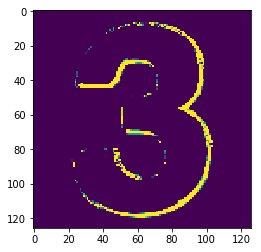

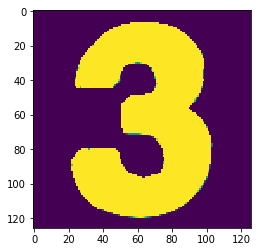

(5, 5, 6, 16)
Dimension after 2nd Convolution: (122, 122, 16)


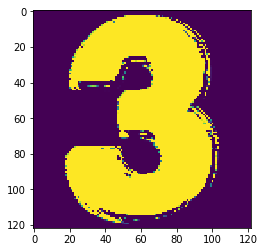

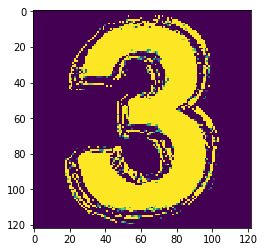

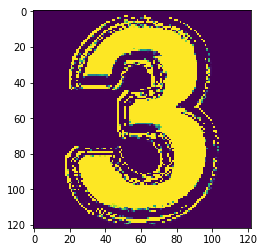

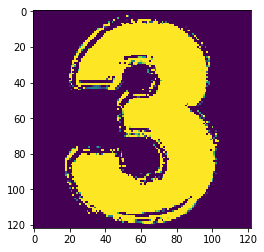

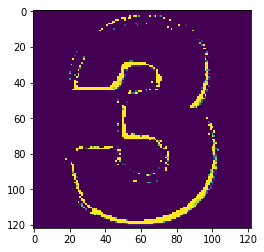

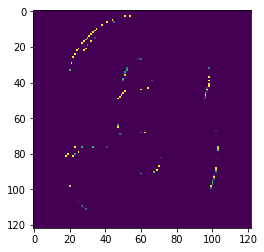

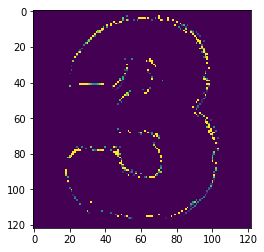

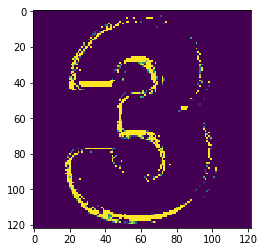

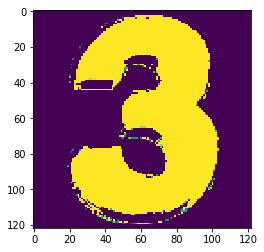

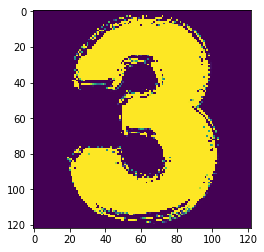

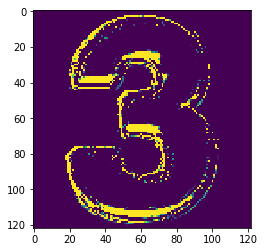

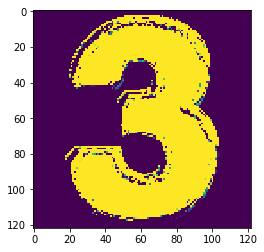

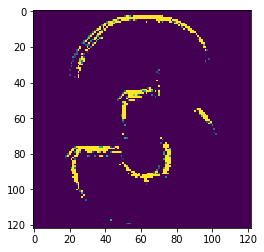

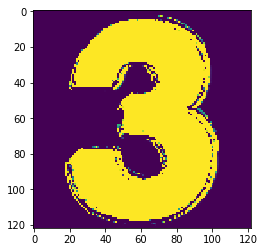

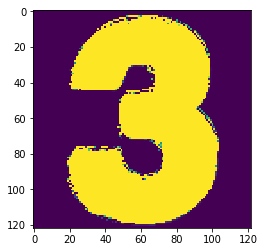

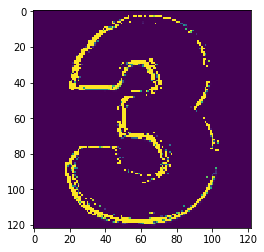

Dimension after 2nd Max Pooling: (61, 61, 16)


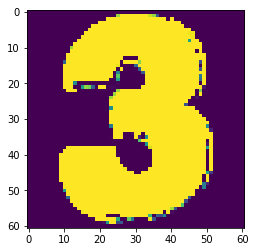

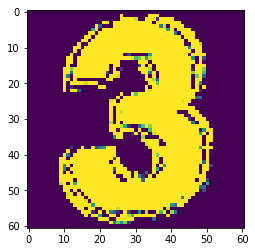

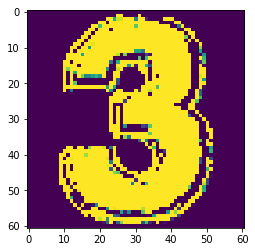

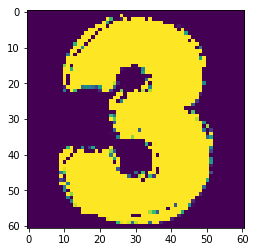

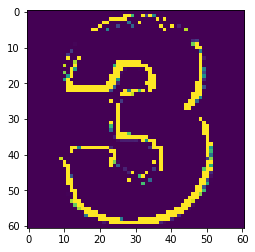

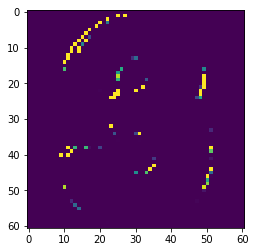

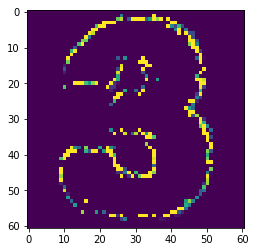

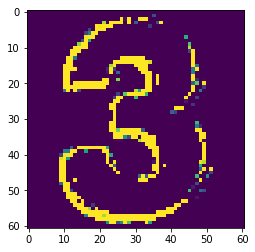

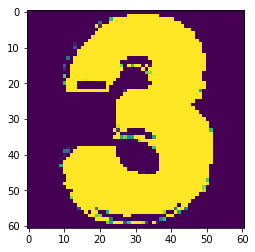

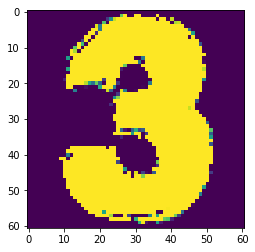

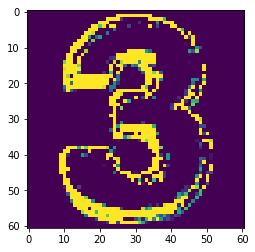

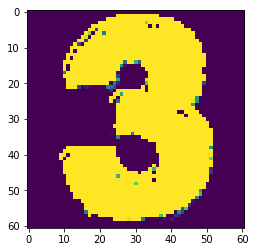

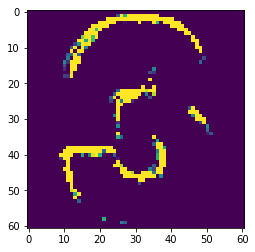

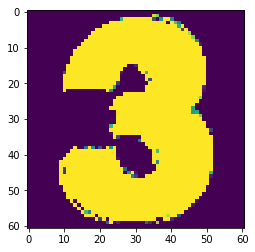

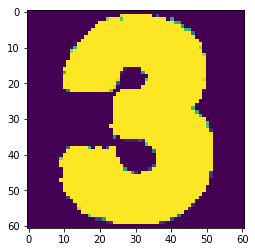

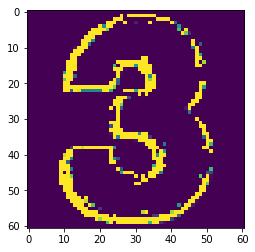

(59536, 1)
(1, 10)
Predicted class of Image: 
3


/home/vatsal/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


In [42]:
# ------------------------ Pass-1 ---------------------------

# create Filter
filterLayer_1 = createFilter(filterRows,filterCols,filterdepth,filterDepthLayer_1)
# print(filterLayer_1)
print(filterLayer_1.shape)
# perform convolution operation
# print(imageArray.shape)
convResult_1 = convolve(reducedImageArray,filterLayer_1)
print("Dimensions after 1st Convolution :",convResult_1.shape)
# Apply Relu function
reluResult_1 = ReLU(convResult_1)
# img1 = Image.fromarray(reluResult_1,'RGB')
# img1 = img1.resize((312,312))
# img1.show()
displayImage(reluResult_1)
poolResult_1 = maxPooling(reluResult_1,poolingRows,poolingCols,stride)
# img1 = Image.fromarray(poolResult_1,'RGB')
# img1 = img1.resize((312,312))
# img1.show()
print("Dimensions after 1st Max Pooling:",poolResult_1.shape)
displayImage(poolResult_1)

# ------------------------ Pass-2 ---------------------------

filterLayer_2 = createFilter(filterRows,filterCols,filterDepthLayer_1,filterDepthLayer_2)
print(filterLayer_2.shape)
convResult_2 = convolve(poolResult_1,filterLayer_2)
print("Dimension after 2nd Convolution:",convResult_2.shape)
reluResult_2 = ReLU(convResult_2)
# img1 = Image.fromarray(reluResult_2,'RGB')
# img1 = img1.resize((312,312))
# img1.show()
displayImage(reluResult_2)
poolResult_2 = maxPooling(reluResult_2,poolingRows,poolingCols,stride)
# img1 = Image.fromarray(poolResult_2,'RGB')
# img1 = img1.resize((312,312))
# img1.show()
print("Dimension after 2nd Max Pooling:",poolResult_2.shape)
displayImage(poolResult_2)

# --------------- Flatten -----------------------

fc = poolResult_2.reshape((poolResult_2.shape[0]*poolResult_2.shape[1]*poolResult_2.shape[2], 1))

# ------------------- Neural Network Forward Pass ---------------------

print(fc.shape)
nnInputUnits = poolResult_2.shape[0]*poolResult_2.shape[1]*poolResult_2.shape[2]
nnOutput = forwardPass(fc,nnInputUnits,nnHiddenUnits1,nnHiddenUnits2,nnOutputUnits)

print(nnOutput.shape)

softmaxRes = softMax(nnOutput[0,:])
print("Predicted class of Image: ")
print(np.argmax(softmaxRes))